In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np


plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

%matplotlib inline

plt.rcParams['figure.figsize'] = [7, 7]

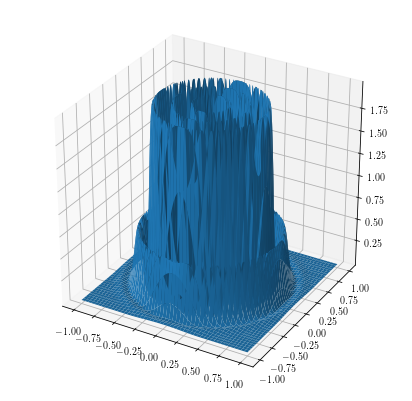

In [40]:
def f2(numpoints, width, freq, power, cutoff):
    x = np.linspace(-width, width, numpoints)
    y = np.linspace(-width, width, numpoints)
    X, Y = np.meshgrid(x, y)
    
    fx = np.sqrt(np.power(X, 2) + np.power(Y, 2))
    sinFx = np.cos(freq*np.pi*fx)+1
    res = np.multiply(sinFx, np.exp(-power*np.maximum(0.0, np.power(fx, 2) - cutoff)))
    return X, Y, res


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, z = f2(1000, 1.0, 10, 10, 0.5)
ax.plot_surface(X, Y, z)
plt.show()

In [7]:
def f(numpoints, width, freq, power, cutoff):
    x = np.linspace(-width, width, numpoints)
    
    fx = np.abs(x)
    sinFx = (np.cos(freq*np.pi*fx) + 1)/2
    res = np.multiply(sinFx, np.exp(-power*np.maximum(0.0, np.power(fx, 2)-cutoff)))
    return x, res

fig = plt.figure()
ax = fig.add_subplot(111)
wid = 1
freq = 5
power = 10
cutoff = 0.5
X, z = f(1000, wid, freq, power, cutoff)
ax.plot(X, z)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.set_title('Regression goal', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

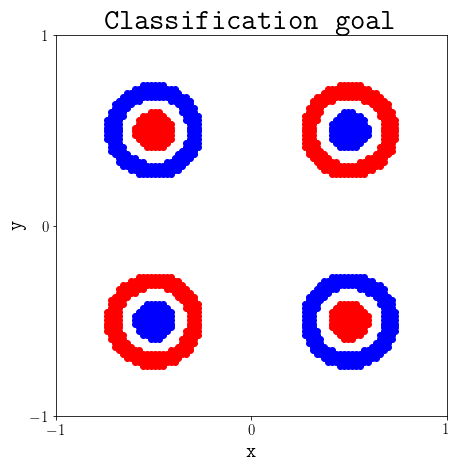

In [10]:
def harderXor(numpoints):
    x = np.linspace(-1, 1, numpoints)
    y = np.linspace(-1, 1, numpoints)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros(X.shape)
    for loc in [[0.5, 0.5], [-0.5, -0.5], [0.5, -0.5], [-0.5, 0.5]]:
        r = np.power(X-loc[0], 2) + np.power(Y-loc[1], 2)
        tlPos = r < 0.01
        tlNeg = np.logical_and(r > 0.03, r < 0.06)

        classification = 1 if np.sum(np.sign(loc)) != 0 else -1
        Z[tlPos] = classification
        Z[tlNeg] = -classification
    
    return X, Y, Z
    
fig = plt.figure()
ax = fig.add_subplot(111)
X, Y, Z = harderXor(100)
ax.scatter(X[Z == 1], Y[Z == 1], color='b')
ax.scatter(X[Z == -1], Y[Z == -1], color='r')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_title('Classification goal', fontsize=30)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()